In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('E:\lec data science\machine learning\student1.csv')

In [3]:
df.head()

,name,gmat,gpa,exp,admitted,country
0,samir,780,4.0,3,1,Ind
1,kaushal,750,3.9,4,1,Ind
2,nandan,690,3.3,3,0,Ind
3,ankit,710,3.7,5,1,us
4,deepika,680,3.9,4,0,Ind


In [4]:
df.drop(['name','country'],axis=1,inplace=True)

In [5]:
df.head()

,gmat,gpa,exp,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gmat      42 non-null     int64  
 1   gpa       42 non-null     float64
 2   exp       42 non-null     int64  
 3   admitted  42 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [7]:
df.describe()

,gmat,gpa,exp,admitted
count,42.000000,42.000000,42.000000,42.000000
mean,653.333333,3.123810,4.023810,0.500000
std,64.113720,0.629289,3.591916,0.506061
min,510.000000,1.700000,1.000000,0.000000
25%,602.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.500000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,24.000000,1.000000


In [8]:
df.isnull().sum()

gmat        0
gpa         0
exp         0
admitted    0
dtype: int64

In [9]:
X=df.drop('admitted',axis=1)

In [10]:
X

,gmat,gpa,exp
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4
5,730,3.7,6
6,690,2.3,1
7,720,3.3,4
8,740,3.3,5
9,690,1.7,1


In [12]:
y=df.admitted

In [14]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: admitted, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
X_train.shape

(33, 3)

In [18]:
X_test.shape

(9, 3)

In [19]:
y_train.shape

(33,)

In [20]:
y_test.shape

(9,)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model= KNeighborsClassifier()

In [24]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
model.predict([[700,4,4.6]])

D:\New folder\New folder\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [26]:
y_pred=model.predict(X_test)

In [27]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [28]:
model.score(X_test,y_test)

0.6666666666666666

In [30]:
score=[]
for K in range(3,13):
    model=KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train,y_train)
    accuracy=model.score(X_test,y_test)
    score.append(accuracy)

In [31]:
score

[0.6666666666666666,
 0.7777777777777778,
 0.6666666666666666,
 0.5555555555555556,
 0.6666666666666666,
 0.8888888888888888,
 0.6666666666666666,
 0.7777777777777778,
 0.6666666666666666,
 0.7777777777777778]

In [32]:
import matplotlib.pyplot as plt

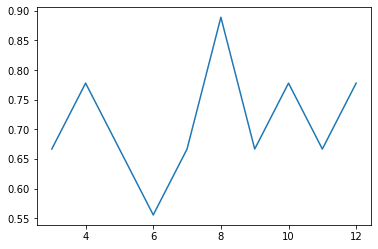

In [35]:
plt.plot(range(3,13),score)
plt.show()

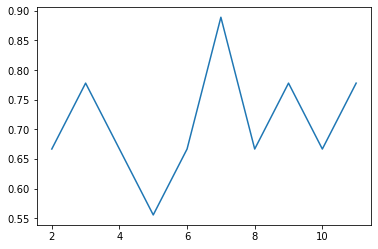

In [45]:
plt.plot(range(2,12),score)
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
 cm=confusion_matrix(y_test,y_pred)

In [49]:
import seaborn as sns

<AxesSubplot:>

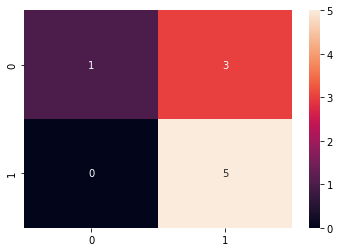

In [50]:
sns.heatmap(cm,annot=True)